# Data processing script drinking water fractionation Spannenburg 

## 0. Introduction

The Jupyter notebook below contains python code for generating graphs used in the manuscript for the tests on drinking water and groundwater conducted at Spannenburg together with KWR and the Vitens water utility.

A Jupyter notebook is a web-based interactive computing platform. It consists of cells that can either be text (Markdown) or lines of executable code (Python). The code can be run cell by cell and adjustments can be made to tweak the graphs. It is very useful for creating a narrative with adequate documentation in the form of text compared to sharing just code that is difficult to understand and is ideally suited to share code with others.

More information can be found at https://jupyter.org
The video series by Serena Bonaretti on YouTube are also very informative to understand what a Jupyter notebook is and can be found at https://www.youtube.com/watch?v=aIbvUDF0Pfg&list=PLj8QFvBykB7fGEH274TlqhToqGd_Qxt1H



## 1. Importing data from Zenodo and importing relevant packages

To ensure reproducibility of the code, all the data is stored in an open access repository called 'Zenodo'. More information about Zenodo can be found through following links:

https://zenodo.org/

https://www.youtube.com/watch?v=aIbvUDF0Pfg&list=PLj8QFvBykB7fGEH274TlqhToqGd_Qxt1H

The data is imported from Zenodo and is then further processed in this script to generate the figures used in the manuscript for the tests conducted at Spannenburg. 

In [1]:
! pip install wget

# if wget is not installed in your environment, the command above installs it in the correct place. 
# The '!' sign tells Jupyter to run this command in the command prompt

import wget # package to download data from zenodo

# if wget is not found (error) then install wget from the 'powershell prompt' within the Anaconda environment by typing
# 'pip install wget' in the command window, then restart the kernel of the Jupyter notebook, then it should work.

# file names and zenodo url
# there is data for tests on drinking water (DW) and groundwater (GW), these are covered in seperate scripts
# here we only generate the graphs for DW
# raw data is stored on Zenodo in the form of averages and standard deviations in UTF-8 compatible csv files
# data was gathered by KWR and reported by the KWR microbiology lab



Defaulting to user installation because normal site-packages is not writeable


In [2]:
DW_file_name_averages  = "20221220_dataset_DW_Spannenburg_averages.csv"
DW_file_name_stdevs = "20221220_dataset_DW_Spannenburg_stdevs.csv"

zenodo_url = "https://zenodo.org/record/8305181/files/" # this is the Zenodo repository where all Spannenburg data is stored

In [3]:
# download the files specified above from the Zenodo repository with the following lines of code

wget.download(zenodo_url + DW_file_name_averages, "./" + DW_file_name_averages) 

'./20221220_dataset_DW_Spannenburg_averages (1).csv'

In [4]:
wget.download(zenodo_url + DW_file_name_stdevs, "./" + DW_file_name_stdevs)

'./20221220_dataset_DW_Spannenburg_stdevs (1).csv'

In [95]:
# import relevant packages

import pandas as pd          # pandas for dataprocessing
import numpy as np           # numpy for numerical operations
import re                    # re for regular expression support (i.e. looking for strings in a dataset)
import os                    # operating system support (to enable code both on mac and windows)

# getting csv files from the specified folder
# double backslashes are used because a single backslash is used as an end statement in python
# file paths are different on Windows and Macintosh, therefore we use a general approach with the os module
# to access the files accross operating systems
# "/" is used on Mac whereas "\" is used on Windows as directory separator, a general directory separator can be
# used by using "os.sep", which automatically adapts to the operating system currently in use

# we use the pd.read_csv function available in pandas to import csv files into a python dataframe
# the python dataframe is stored in the local memory with two variable names (df_averages and df_stdevs)
# we can use these variable names further in the script to perform all sorts of operations on them


df_averages = pd.read_csv("./" + DW_file_name_averages, encoding = "UTF-8", sep = ';', decimal = '.')
df_stdevs = pd.read_csv("./" + DW_file_name_stdevs, encoding = "UTF-8", sep = ';', decimal = '.')


In [6]:
# after defining the variable names, we can explicitly show the python dataframes by calling the variables in the code
# after running this cell, a table appears with all data from the csv file neatly presented in a table layout
# NaN values indicate no data was measured for this specific parameter - sampling point combination

df_averages

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,MP1,0,-0.1,4.2,51.4,1.50,1.00,2.60,3.6,10.0,1.0,660.0,170.0,460.0,1301.0
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,0.5,0.7,7.6,0.03,0.72,0.63,1.4,2.0,1.0,177.0,65.0,148.0,393.0
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,MP6,0,5.5,6.4,56.5,0.07,0.60,2.60,3.2,4.0,1.0,1263.0,344.0,897.0,2509.0
5,MP7,0,2.7,5.0,56.1,4.70,1.30,4.40,5.7,103.0,1.0,1998.0,459.0,1200.0,3761.0
6,MP1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,256.0,788.0,8.0,576.0,1632.0
7,MP3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,83.0,17.0,60.0,164.0
9,MP5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,298.0,827.0,1.0,617.0,1750.0


In [7]:
df_averages.dtypes

# this shows the datatypes in the dataset (objects, integers and floats)

# object = sampling point name (for example 'MP1')
# integer = integer numbers (for example week '0')
# float = floating numbers (for example AOC P17 value of '3.4')

Sampling point      object
Week                 int64
BP7-BP0            float64
BP7                float64
BPC14              float64
AOC A3             float64
AOC P17            float64
AOC NOX            float64
AOC total          float64
Biopolymers        float64
Humics             float64
Building blocks    float64
LMW acids          float64
LMW neutrals       float64
CDOC               float64
dtype: object

In [8]:
df_stdevs

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,MP1,0,0.4,0.4,5.1,0.35,0.49,0.47,0.48,NaN,NaN,NaN,NaN,NaN,NaN
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,0.4,0.4,1.7,0.00,0.23,0.05,0.16,NaN,NaN,NaN,NaN,NaN,NaN
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MP6,0,1.4,1.3,18.4,0.00,0.33,0.43,0.38,NaN,NaN,NaN,NaN,NaN,NaN
5,MP7,0,0.8,0.8,2.0,0.07,0.07,0.43,0.31,NaN,NaN,NaN,NaN,NaN,NaN
6,MP1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MP3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MP5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_stdevs.dtypes

Sampling point      object
Week                 int64
BP7-BP0            float64
BP7                float64
BPC14              float64
AOC A3             float64
AOC P17            float64
AOC NOX            float64
AOC total          float64
Biopolymers        float64
Humics             float64
Building blocks    float64
LMW acids          float64
LMW neutrals       float64
CDOC               float64
dtype: object

# 2. Chemical analysis
## 2.1 LC-OCD

The recorded LC-OCD datapoints are converted into graphs.

In [10]:
# matplotlib is a package in python used for plotting figures

import matplotlib.pyplot as plt

In [12]:
# figures can be directly exported to a local folder on your computer
# go to the desired folder in your file explorer and copy the directory (including a backslash at the end!) into the prompt
# generated below which states 'Enter a file path:'
# the 'os' package makes sure the code works both on mac and windows
# these two operating systems define paths differently (they use different 'slashes') but the os package solves this
# you need to change this path and specify which folder you want the figures to upload to, or the code will not work
# if the path exists, the function will return 'the file path exists'
# if the path does not exist, the function will return 'No such file or directory' and you will need to 
# carefully check the directory and run this cell again with the correct directory


fig_path = input('Enter a file path: ')

# e.g. C:\Users\Bob\Desktop\Data\ on Windows

# or /home/Bob/Desktop/Data/ on UNIX (mac or linux)

print(fig_path)

if os.path.exists(fig_path):
    print('The file path exists')


else:
    raise FileNotFoundError('No such file or directory')

Enter a file path: C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Manuscripts\Spannenburg_biostab\Code\
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Manuscripts\Spannenburg_biostab\Code\
The file path exists


In [14]:
# make sure you entered a back slash at the end when inputting the figure path
# otherwise the files will be saved in the second to last folder you specified and not the one you want

fig_path

'C:\\Users\\cdierend\\OneDrive - UGent\\Universiteit Gent\\Manuscripts\\Spannenburg_biostab\\Code\\'

In [15]:
# We assign a unique color to each LC-OCD fraction that we use consistently throughout the paper
# We make use of a dictionary for this purpose
# A colorpalette will help us to have visually attractive colors that fit well together
# We import seaborn (another python package) that comes with some nice color palettes that we can use
# It is not necessary to use color palettes and just define each color manually using hex codes or rgb values 
# see commented out code below, simply comment out the palette code and comment in the hex/rgb code
# to comment out entire blocks of code, simply select the lines of code you want to comment out and press 'ctrl + /' button
# on the keyboard

# Color palette code

import seaborn as sns

palette_set2 = sns.color_palette("Set2", 10)

# for absolute figures (expressed as concentrations in ug/L)
                
# color_dict = {'Biopolymers':palette_set2[3], 
#               'Humics': palette_set2[0], 
#               'Building blocks':palette_set2[5], 
#               'LMW acids': palette_set2[1], 
#               'LMW neutrals': palette_set2[2]}

# # for relative figures (expressed as percentages in percent)

# color_dict_percent = {'biopolymers percent':palette_set2[3], 
#               'humics percent': palette_set2[0], 
#               'building blocks percent':palette_set2[5], 
#               'LMW acids percent': palette_set2[1], 
#               'LMW neutrals percent': palette_set2[2]}



# Manual color code (based on colors in KWR BIOSTAB report)

# Biopolymers - purple, humics - green, building blocks - gold, LMWAs - red, LMWNs - blue

color_dict = {'Biopolymers': '#7030A0', 
              'Humics': '#00B050', 
              'Building blocks': '#FFC000', 
              'LMW acids': '#FF0000', 
              'LMW neutrals': '#1E83CA'}

color_dict_percent = {'biopolymers percent': '#7030A0', 
              'humics percent': '#00B050', 
              'building blocks percent': '#FFC000', 
              'LMW acids percent': '#FF0000', 
              'LMW neutrals percent': '#1E83CA'}


In [16]:
# We make a copy of the dataframe only containing the LC-OCD data for the relevant sampling points:
# MP1, MP4, MP6 and MP7

df_OC = df_averages[["Sampling point","Week","Biopolymers", "Humics", "Building blocks", "LMW acids", "LMW neutrals"]].copy()
df_OC['Week'] = pd.to_numeric(df_OC['Week'])
df_OC

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals
0,MP1,0,10.0,1.0,660.0,170.0,460.0
1,MP3,0,NaN,NaN,NaN,NaN,NaN
2,MP4,0,2.0,1.0,177.0,65.0,148.0
3,MP5,0,NaN,NaN,NaN,NaN,NaN
4,MP6,0,4.0,1.0,1263.0,344.0,897.0
5,MP7,0,103.0,1.0,1998.0,459.0,1200.0
6,MP1,7,4.0,256.0,788.0,8.0,576.0
7,MP3,7,NaN,NaN,NaN,NaN,NaN
8,MP4,7,3.0,1.0,83.0,17.0,60.0
9,MP5,7,7.0,298.0,827.0,1.0,617.0


In [17]:
df_OC.dtypes

Sampling point      object
Week                 int64
Biopolymers        float64
Humics             float64
Building blocks    float64
LMW acids          float64
LMW neutrals       float64
dtype: object

In [18]:
# here we slice out the MPs were are not interested in (MP3 and MP5, which are either not measured or not relevant for the figures)

df_OC_fractions = df_OC.loc[df_OC['Sampling point'].isin(["MP1", "MP4", "MP6", "MP7"])]
df_OC_fractions

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals
0,MP1,0,10.0,1.0,660.0,170.0,460.0
2,MP4,0,2.0,1.0,177.0,65.0,148.0
4,MP6,0,4.0,1.0,1263.0,344.0,897.0
5,MP7,0,103.0,1.0,1998.0,459.0,1200.0
6,MP1,7,4.0,256.0,788.0,8.0,576.0
8,MP4,7,3.0,1.0,83.0,17.0,60.0
10,MP6,7,4.0,439.0,1251.0,1.0,979.0
11,MP7,7,31.0,682.0,1732.0,1.0,1167.0
12,MP1,15,13.0,409.0,1036.0,39.0,539.0
14,MP4,15,1.0,1.0,6.0,20.0,18.0


In [19]:
# next we rename the MPs (in Dutch) to something more suitable for an article (in English) using a dictionary

fraction_dict = {'MP1': 'DW', 
                 'MP4': 'LMW', 
                 'MP6': 'MMW', 
                 'MP7': 'HMW'}

df_OC_fractions_graph = df_OC_fractions.replace({"Sampling point": fraction_dict})
df_OC_fractions_graph = df_OC_fractions_graph.reset_index(drop=True)
df_OC_fractions_graph


# resetting the index is required in order to plot the data inside the zoomed in axin regions
# see next block of code!

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals
0,DW,0,10.0,1.0,660.0,170.0,460.0
1,LMW,0,2.0,1.0,177.0,65.0,148.0
2,MMW,0,4.0,1.0,1263.0,344.0,897.0
3,HMW,0,103.0,1.0,1998.0,459.0,1200.0
4,DW,7,4.0,256.0,788.0,8.0,576.0
5,LMW,7,3.0,1.0,83.0,17.0,60.0
6,MMW,7,4.0,439.0,1251.0,1.0,979.0
7,HMW,7,31.0,682.0,1732.0,1.0,1167.0
8,DW,15,13.0,409.0,1036.0,39.0,539.0
9,LMW,15,1.0,1.0,6.0,20.0,18.0


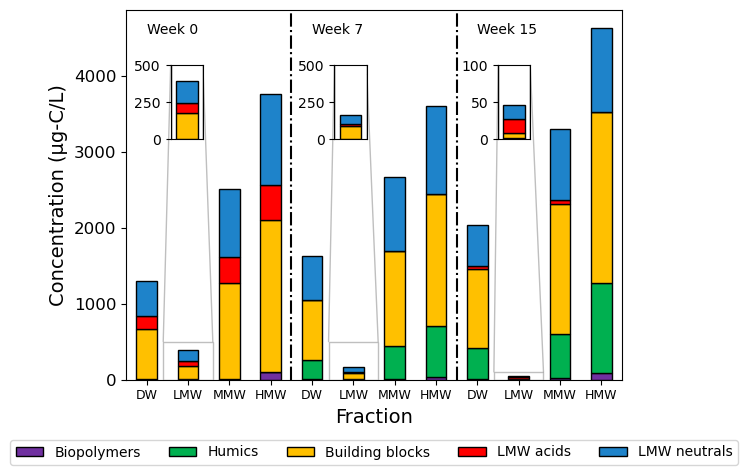

In [46]:
axis = df_OC_fractions_graph.plot.bar(x="Sampling point", 
                               y = ["Biopolymers", "Humics", "Building blocks", "LMW acids", "LMW neutrals"], 
                               stacked = True, 
                               edgecolor = "black", 
                               color = color_dict)

plt.xlabel("Fraction", fontsize = 14)
plt.ylabel("Concentration (µg-C/L)", fontsize = 14)

plt.xticks(rotation = 0, fontsize = 9)
plt.yticks(fontsize = 12)

plt.axvline(x = 3.5, color = 'black', linestyle="-.")
plt.axvline(x = 7.5, color = 'black', linestyle="-.")

plt.text(0, 4700, 'Week 0', ha='left', va='top')
plt.text(4, 4700, 'Week 7', ha='left', va='top')
plt.text(8, 4700, 'Week 15', ha='left', va='top')

plt.legend(bbox_to_anchor=(0.50, -0.25), loc='lower center', ncol = 5)

axin1 = axis.inset_axes([0.09, 0.65, 0.065, 0.2])

axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Biopolymers"], color = color_dict['Biopolymers'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Humics"], bottom=df_OC_fractions_graph["Biopolymers"], color = color_dict['Humics'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Building blocks"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"], color = color_dict['Building blocks'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW acids"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"], color = color_dict['LMW acids'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW neutrals"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"]+df_OC_fractions_graph["LMW acids"], color = color_dict['LMW neutrals'], edgecolor = "black")

axin1.set_xlim(0.4,1.6)
axin1.set_xticks([])
axin1.set_ylim(0, 500)
axis.indicate_inset_zoom(axin1)

axin2 = axis.inset_axes([0.42, 0.65, 0.065, 0.2])

axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Biopolymers"], color = color_dict['Biopolymers'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Humics"], bottom=df_OC_fractions_graph["Biopolymers"], color = color_dict['Humics'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Building blocks"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"], color = color_dict['Building blocks'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW acids"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"], color = color_dict['LMW acids'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW neutrals"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"]+df_OC_fractions_graph["LMW acids"], color = color_dict['LMW neutrals'], edgecolor = "black")

axin2.set_xlim(4.4,5.6)
axin2.set_xticks([])
axin2.set_ylim(0, 500)
axis.indicate_inset_zoom(axin2)

axin3 = axis.inset_axes([0.75, 0.65, 0.065, 0.2])

axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Biopolymers"], color = color_dict['Biopolymers'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Humics"], bottom=df_OC_fractions_graph["Biopolymers"], color = color_dict['Humics'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Building blocks"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"], color = color_dict['Building blocks'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW acids"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"], color = color_dict['LMW acids'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW neutrals"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"]+df_OC_fractions_graph["LMW acids"], color = color_dict['LMW neutrals'], edgecolor = "black")


axin3.set_xlim(8.4,9.6)
axin3.set_xticks([])
axin3.set_ylim(0, 100)
axis.indicate_inset_zoom(axin3)


plt.show

# comment out the line below to check if the figure looks okay
# once you have dialed in the figure and it is perfect, uncomment the line below and run this cell
# then the figure will be exported to the figure path defined above

plt.savefig(fig_path + 'DW_LCOCD_absolute.png', dpi=200, bbox_inches='tight')

In [40]:
# next we make a 100% stacked chart, also called a 'relative' chart, with fraction expressed as perecentages of the total CDOC

In [41]:
# we also add a column 'CDOC' which contains the sum of all fractions

df_OC_fractions_graph['CDOC'] =  df_OC_fractions_graph[['Biopolymers', 'Humics', 'Building blocks', 'LMW acids', 'LMW neutrals']].sum(axis=1)
df_OC_fractions_graph

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,DW,0,10.0,1.0,660.0,170.0,460.0,1301.0
1,LMW,0,2.0,1.0,177.0,65.0,148.0,393.0
2,MMW,0,4.0,1.0,1263.0,344.0,897.0,2509.0
3,HMW,0,103.0,1.0,1998.0,459.0,1200.0,3761.0
4,DW,7,4.0,256.0,788.0,8.0,576.0,1632.0
5,LMW,7,3.0,1.0,83.0,17.0,60.0,164.0
6,MMW,7,4.0,439.0,1251.0,1.0,979.0,2674.0
7,HMW,7,31.0,682.0,1732.0,1.0,1167.0,3613.0
8,DW,15,13.0,409.0,1036.0,39.0,539.0,2036.0
9,LMW,15,1.0,1.0,6.0,20.0,18.0,46.0


In [42]:
df_OC_fractions_graph.dtypes

Sampling point      object
Week                 int64
Biopolymers        float64
Humics             float64
Building blocks    float64
LMW acids          float64
LMW neutrals       float64
CDOC               float64
dtype: object

In [43]:
df_OC_fractions_graph["biopolymers percent"] = ((df_OC_fractions_graph["Biopolymers"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["humics percent"] = ((df_OC_fractions_graph["Humics"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["building blocks percent"] = ((df_OC_fractions_graph["Building blocks"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["LMW acids percent"] = ((df_OC_fractions_graph["LMW acids"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["LMW neutrals percent"] = ((df_OC_fractions_graph["LMW neutrals"]/df_OC_fractions_graph["CDOC"])*100)

df_OC_fractions_graph

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC,biopolymers percent,humics percent,building blocks percent,LMW acids percent,LMW neutrals percent
0,DW,0,10.0,1.0,660.0,170.0,460.0,1301.0,0.768640,0.076864,50.730208,13.066872,35.357417
1,LMW,0,2.0,1.0,177.0,65.0,148.0,393.0,0.508906,0.254453,45.038168,16.539440,37.659033
2,MMW,0,4.0,1.0,1263.0,344.0,897.0,2509.0,0.159426,0.039857,50.338780,13.710642,35.751295
3,HMW,0,103.0,1.0,1998.0,459.0,1200.0,3761.0,2.738633,0.026589,53.124169,12.204201,31.906408
4,DW,7,4.0,256.0,788.0,8.0,576.0,1632.0,0.245098,15.686275,48.284314,0.490196,35.294118
5,LMW,7,3.0,1.0,83.0,17.0,60.0,164.0,1.829268,0.609756,50.609756,10.365854,36.585366
6,MMW,7,4.0,439.0,1251.0,1.0,979.0,2674.0,0.149589,16.417352,46.783844,0.037397,36.611818
7,HMW,7,31.0,682.0,1732.0,1.0,1167.0,3613.0,0.858013,18.876280,47.938002,0.027678,32.300028
8,DW,15,13.0,409.0,1036.0,39.0,539.0,2036.0,0.638507,20.088409,50.884086,1.915521,26.473477
9,LMW,15,1.0,1.0,6.0,20.0,18.0,46.0,2.173913,2.173913,13.043478,43.478261,39.130435


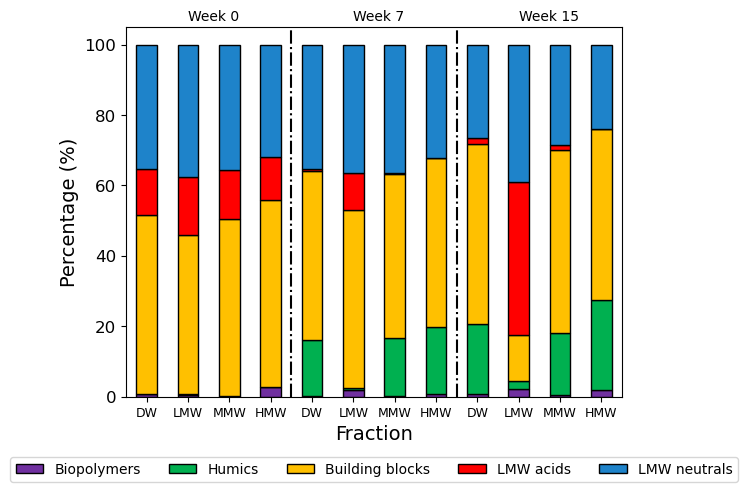

In [47]:
axis = df_OC_fractions_graph.plot.bar(x="Sampling point", 
                               y = ["biopolymers percent", "humics percent", "building blocks percent", "LMW acids percent", "LMW neutrals percent"], 
                               stacked = True, 
                               edgecolor = "black", 
                               color = color_dict_percent)

plt.xlabel("Fraction", fontsize = 14)
plt.ylabel("Percentage (%)", fontsize = 14)

plt.xticks(rotation = 0, fontsize = 9)
plt.yticks(fontsize = 12)


plt.text(1, 110, 'Week 0', ha='left', va='top')
plt.text(5, 110, 'Week 7', ha='left', va='top')
plt.text(9, 110, 'Week 15', ha='left', va='top')

plt.legend(['Biopolymers', 'Humics', 'Building blocks', 'LMW acids', 'LMW neutrals'], bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol = 5)

plt.axvline(x = 3.5, color = 'black', linestyle="-.")
plt.axvline(x = 7.5, color = 'black', linestyle="-.")

#plt.show()

plt.savefig(fig_path + 'DW_LCOCD_relative.png', dpi=200, bbox_inches='tight')

# 3. Biological analysis

Next, we make the figures for the biological parameters (AOC, BPP).

## 3.1 Averages

In [48]:
# We make a copy of the dataframe only containing the biological data averages for the relevant sampling points:
# MP1, MP4, MP6 and MP7
# Only week 0 was analyzed for biological data

df_bio_average = df_averages[["Sampling point","Week","BP7-BP0", "BP7", "BPC14", "AOC A3", "AOC P17", "AOC NOX", "AOC total"]].copy()
df_bio_average['Week'] = pd.to_numeric(df_bio_average['Week'])
df_bio_average

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,MP1,0,-0.1,4.2,51.4,1.50,1.00,2.60,3.6
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,0.5,0.7,7.6,0.03,0.72,0.63,1.4
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MP6,0,5.5,6.4,56.5,0.07,0.60,2.60,3.2
5,MP7,0,2.7,5.0,56.1,4.70,1.30,4.40,5.7
6,MP1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MP3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MP5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# select only the relevant MPs by dropping all cells containing NaN values

df_bio_average_graph = df_bio_average.dropna()
df_bio_average_graph = df_bio_average_graph.replace({"Sampling point": fraction_dict})
df_bio_average_graph = df_bio_average_graph.reset_index(drop=True)

# reindexing required for cellwise division later on (AOC/CDOC)


df_bio_average_graph

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,DW,0,-0.1,4.2,51.4,1.50,1.00,2.60,3.6
1,LMW,0,0.5,0.7,7.6,0.03,0.72,0.63,1.4
2,MMW,0,5.5,6.4,56.5,0.07,0.60,2.60,3.2
3,HMW,0,2.7,5.0,56.1,4.70,1.30,4.40,5.7


## 3.2 Stdevs

In [50]:
# We make a copy of the dataframe only containing the biological data stdevs for the relevant sampling points:
# MP1, MP4, MP6 and MP7
# Only week 0 was analyzed for biological data

df_bio_stdev = df_stdevs[["Sampling point","Week","BP7-BP0", "BP7", "BPC14", "AOC A3", "AOC P17", "AOC NOX", "AOC total"]].copy()
df_bio_stdev['Week'] = pd.to_numeric(df_bio_average['Week'])
df_bio_stdev

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,MP1,0,0.4,0.4,5.1,0.35,0.49,0.47,0.48
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,0.4,0.4,1.7,0.00,0.23,0.05,0.16
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MP6,0,1.4,1.3,18.4,0.00,0.33,0.43,0.38
5,MP7,0,0.8,0.8,2.0,0.07,0.07,0.43,0.31
6,MP1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MP3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MP5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# drop the missing values and replace sampling points with fraction names (DW, LMW, MMW, HMW)

df_bio_stdev_graph = df_bio_stdev.dropna()
df_bio_stdev_graph = df_bio_stdev_graph.replace({"Sampling point": fraction_dict})
df_bio_stdev_graph = df_bio_stdev_graph.reset_index(drop=True)

df_bio_stdev_graph

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,DW,0,0.4,0.4,5.1,0.35,0.49,0.47,0.48
1,LMW,0,0.4,0.4,1.7,0.00,0.23,0.05,0.16
2,MMW,0,1.4,1.3,18.4,0.00,0.33,0.43,0.38
3,HMW,0,0.8,0.8,2.0,0.07,0.07,0.43,0.31


In [65]:
# define the errorbars in a new dataframe

y_error_P17 = df_bio_stdev_graph["AOC P17"]
y_error_NOX = df_bio_stdev_graph["AOC NOX"]
y_error_total = df_bio_stdev_graph["AOC total"]
y_error_A3 = df_bio_stdev_graph["AOC A3"]


# 3.3 AOC figures
### 3.3.1 AOC P17, NOX, total

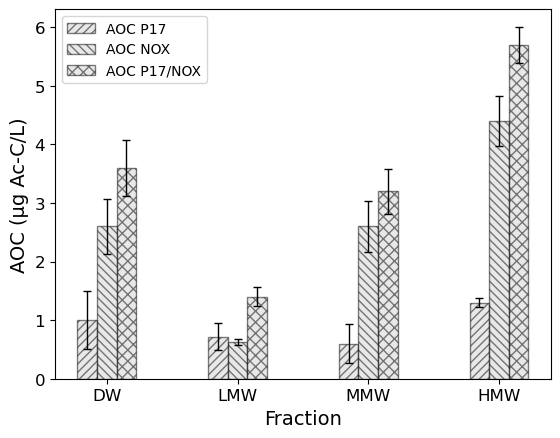

In [66]:
labels = ['DW', 'LMW', 'MMW', 'HMW']

# Setting the positions and width for the bars
pos = list(range(len(df_bio_average_graph["AOC P17"])))
width = 0.15 # the width of a bar

# Plotting the bars
fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["AOC P17"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='////',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_P17,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_graph["AOC NOX"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='\\\\\\\\',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_NOX,
        error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width*2 for p in pos], df_bio_average_graph["AOC total"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='xxx',
        label=labels[2],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_total,
        error_kw = dict(lw=1, capsize=3, capthick=1))

# Setting axis labels and ticks
ax.set_ylabel('AOC (µg Ac-C/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)

# Adding the legend and showing the plot
plt.legend(['AOC P17', 'AOC NOX', 'AOC P17/NOX'], loc='upper left')

plt.show()

# plt.savefig(fig_path + 'DW_AOC_P17_NOX_TOTAL.png', dpi=200, bbox_inches='tight')

### 3.3.2 AOC A3 and total

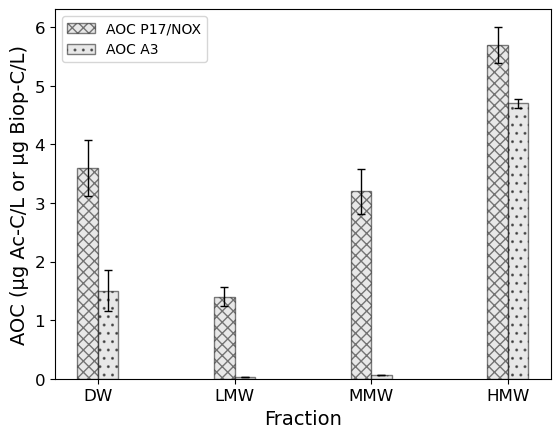

In [67]:
fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["AOC total"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='xxx',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_total,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_graph["AOC A3"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='..',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_A3,
        error_kw = dict(lw=1, capsize=3, capthick=1))


# Setting axis labels and ticks
ax.set_ylabel('AOC (µg Ac-C/L or µg Biop-C/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)

# Adding the legend and showing the plot
plt.legend(['AOC P17/NOX', 'AOC A3'], loc='upper left')

plt.show()

# plt.savefig(fig_path + 'DW_AOC_TOTAL_A3.png', dpi=200, bbox_inches='tight')

### 3.3.3 normalized AOC total graph

We can only make this plot for drinking water in week 0 in Spannenburg, since all fractions had the same composition (see LC-OCD profiles above) but differed in C-concentration. In the Andijk story, this is not the case.

In [68]:
df_OC_CDOC = df_OC_fractions_graph[["Sampling point", "Week", "CDOC"]]
df_OC_CDOC

# problem with code, not recognizing week number as integer or float? problem with isin function?

,Sampling point,Week,CDOC
0,DW,0,1301.0
1,LMW,0,393.0
2,MMW,0,2509.0
3,HMW,0,3761.0
4,DW,7,1632.0
5,LMW,7,164.0
6,MMW,7,2674.0
7,HMW,7,3613.0
8,DW,15,2036.0
9,LMW,15,46.0


In [69]:
df_OC_CDOC.dtypes

Sampling point     object
Week                int64
CDOC              float64
dtype: object

In [70]:
df_OC_CDOC_week_0 = df_OC_CDOC.loc[df_OC_CDOC['Week'].isin([0])]
df_OC_CDOC_week_0

,Sampling point,Week,CDOC
0,DW,0,1301.0
1,LMW,0,393.0
2,MMW,0,2509.0
3,HMW,0,3761.0


In [71]:
df_bio_average_norm = df_OC_CDOC_week_0.copy()

df_bio_average_norm["AOC total average norm"] = (df_bio_average_graph["AOC total"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_average_norm

,Sampling point,Week,CDOC,AOC total average norm
0,DW,0,1301.0,2.767102
1,LMW,0,393.0,3.562341
2,MMW,0,2509.0,1.275409
3,HMW,0,3761.0,1.515554


In [72]:
df_bio_stdev_norm = df_OC_CDOC_week_0.copy()

df_bio_stdev_norm["AOC total stdev norm"] = (df_bio_stdev_graph["AOC total"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_stdev_norm

,Sampling point,Week,CDOC,AOC total stdev norm
0,DW,0,1301.0,0.368947
1,LMW,0,393.0,0.407125
2,MMW,0,2509.0,0.151455
3,HMW,0,3761.0,0.082425


<function matplotlib.pyplot.show(close=None, block=None)>

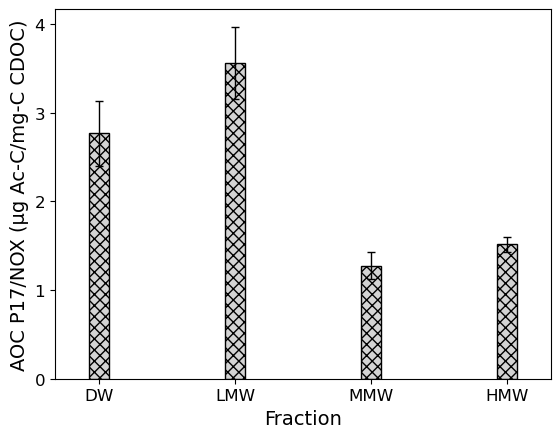

In [73]:
from matplotlib.ticker import FormatStrFormatter

y_error_AOC_total_norm = df_bio_stdev_norm["AOC total stdev norm"]

ax = df_bio_average_norm.plot(kind = "bar", 
                         width = 0.15,
                         x="Sampling point", 
                         y=["AOC total average norm"], 
                         yerr = [y_error_AOC_total_norm], 
                         ecolor='black', 
                         color = 'lightgrey',
                         error_kw=dict(lw=1, capsize=3, capthick=1), 
                         edgecolor = "black",
                         hatch = "xxx")

plt.xlabel("Fraction", fontsize = 14)
plt.ylabel("AOC P17/NOX (µg Ac-C/mg-C CDOC)", fontsize = 14)

plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)

plt.locator_params(axis='y', nbins=5)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend('',frameon=False)

plt.show

# plt.savefig(fig_path + 'DW_AOC_TOTAL_NORM.png', dpi=200, bbox_inches='tight')

## 3.4 BPP figures

In [74]:
df_bio_average_graph

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,DW,0,-0.1,4.2,51.4,1.50,1.00,2.60,3.6
1,LMW,0,0.5,0.7,7.6,0.03,0.72,0.63,1.4
2,MMW,0,5.5,6.4,56.5,0.07,0.60,2.60,3.2
3,HMW,0,2.7,5.0,56.1,4.70,1.30,4.40,5.7


In [75]:
df_bio_stdev_graph

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,DW,0,0.4,0.4,5.1,0.35,0.49,0.47,0.48
1,LMW,0,0.4,0.4,1.7,0.00,0.23,0.05,0.16
2,MMW,0,1.4,1.3,18.4,0.00,0.33,0.43,0.38
3,HMW,0,0.8,0.8,2.0,0.07,0.07,0.43,0.31


In [76]:
y_error_BP7_BP0 = df_bio_stdev_graph["BP7-BP0"]
y_error_BP7 = df_bio_stdev_graph["BP7"]
y_error_BPC14 = df_bio_stdev_graph["BPC14"]

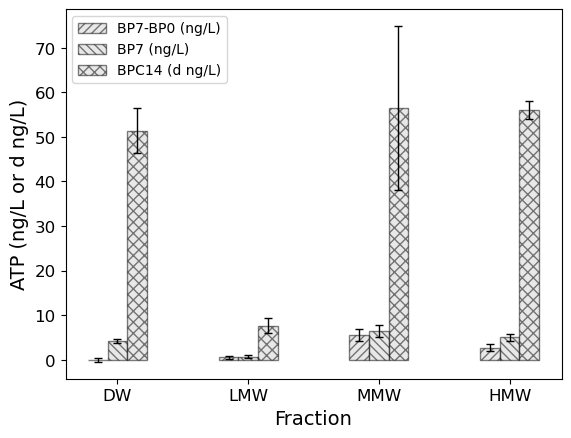

In [77]:
# Setting the positions and width for the bars
pos = list(range(len(df_bio_average_graph["BP7"])))
width = 0.15 # the width of a bar

# Plotting the bars
fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["BP7-BP0"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='////',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7_BP0,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_graph["BP7"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='\\\\\\\\',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BP7,
        error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width*2 for p in pos], df_bio_average_graph["BPC14"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='xxx',
        label=labels[2],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BPC14,
        error_kw = dict(lw=1, capsize=3, capthick=1))

# Setting axis labels and ticks
ax.set_ylabel('ATP (ng/L or d ng/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)

# Adding the legend and showing the plot
plt.legend(['BP7-BP0 (ng/L)', 'BP7 (ng/L)', 'BPC14 (d ng/L)'], loc='upper left')

plt.show()

# not so clear with the three metrics plotted together, better to plot BP7-BP0 + BP7 and BP7 + BPC14

# plt.savefig(fig_path + 'DW_BPP.png', dpi=200, bbox_inches='tight')

In [78]:
df_bio_average_graph["BP7-BP0"]

0   -0.1
1    0.5
2    5.5
3    2.7
Name: BP7-BP0, dtype: float64

In [79]:
y_error_BP7

0    0.4
1    0.4
2    1.3
3    0.8
Name: BP7, dtype: float64

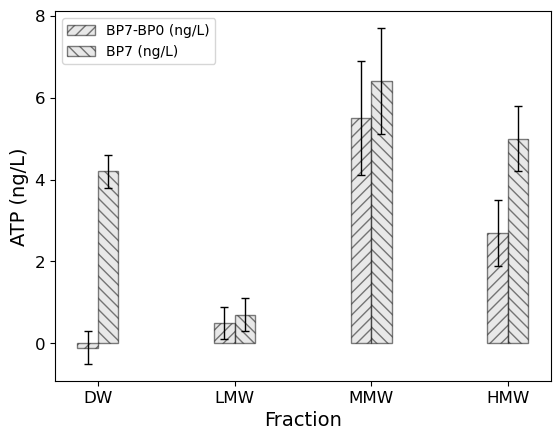

In [80]:
# more clear BP7-BP0 + BP7 plot

fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["BP7-BP0"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='///',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7_BP0,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_graph["BP7"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='\\\\\\',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BP7,
        error_kw = dict(lw=1, capsize=3, capthick=1))


# Setting axis labels and ticks
ax.set_ylabel('ATP (ng/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)

# Adding the legend and showing the plot
plt.legend(['BP7-BP0 (ng/L)', 'BP7 (ng/L)'], loc='upper left')

plt.show()

# plt.savefig(fig_path + 'DW_BP7.png', dpi=200, bbox_inches='tight')

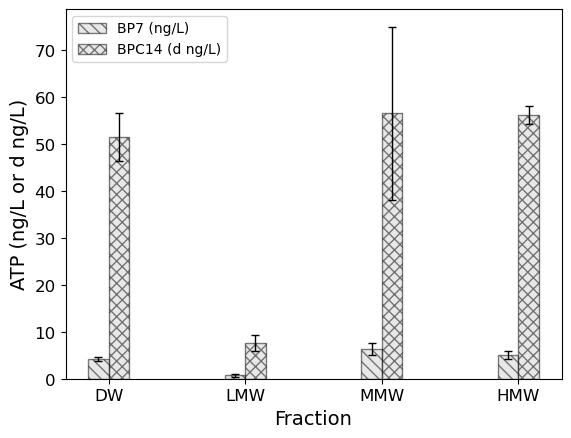

In [81]:
# more clear BPC14 plot

fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["BP7"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='\\\\\\',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_graph["BPC14"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='xxx',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BPC14,
        error_kw = dict(lw=1, capsize=3, capthick=1))


# Setting axis labels and ticks
ax.set_ylabel('ATP (ng/L or d ng/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)

# Adding the legend and showing the plot
plt.legend(['BP7 (ng/L)', 'BPC14 (d ng/L)'], loc='upper left')

plt.show()

# plt.savefig(fig_path + 'DW_BPC14.png', dpi=200, bbox_inches='tight')

## 3.5 Normalized BPP figures

In [82]:
df_bio_average_norm["BP7-BP0 average norm"] = (df_bio_average_graph["BP7-BP0"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_average_norm["BP7 average norm"] = (df_bio_average_graph["BP7"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_average_norm["BPC14 average norm"] = (df_bio_average_graph["BPC14"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_average_norm

,Sampling point,Week,CDOC,AOC total average norm,BP7-BP0 average norm,BP7 average norm,BPC14 average norm
0,DW,0,1301.0,2.767102,-0.076864,3.228286,39.508071
1,LMW,0,393.0,3.562341,1.272265,1.781170,19.338422
2,MMW,0,2509.0,1.275409,2.192108,2.550817,22.518932
3,HMW,0,3761.0,1.515554,0.717894,1.329434,14.916246


In [83]:
df_bio_stdev_norm["BP7-BP0 stdev norm"] = (df_bio_stdev_graph["BP7-BP0"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_stdev_norm["BP7 stdev norm"] = (df_bio_stdev_graph["BP7"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_stdev_norm["BPC14 stdev norm"] = (df_bio_stdev_graph["BPC14"]/df_OC_CDOC_week_0["CDOC"])*1000
df_bio_stdev_norm

,Sampling point,Week,CDOC,AOC total stdev norm,BP7-BP0 stdev norm,BP7 stdev norm,BPC14 stdev norm
0,DW,0,1301.0,0.368947,0.307456,0.307456,3.920061
1,LMW,0,393.0,0.407125,1.017812,1.017812,4.325700
2,MMW,0,2509.0,0.151455,0.557991,0.518135,7.333599
3,HMW,0,3761.0,0.082425,0.212709,0.212709,0.531773


In [84]:
y_error_BP7_BP0_norm = df_bio_stdev_norm["BP7-BP0 stdev norm"]
y_error_BP7_norm = df_bio_stdev_norm["BP7 stdev norm"]
y_error_BPC14_norm = df_bio_stdev_norm["BPC14 stdev norm"]

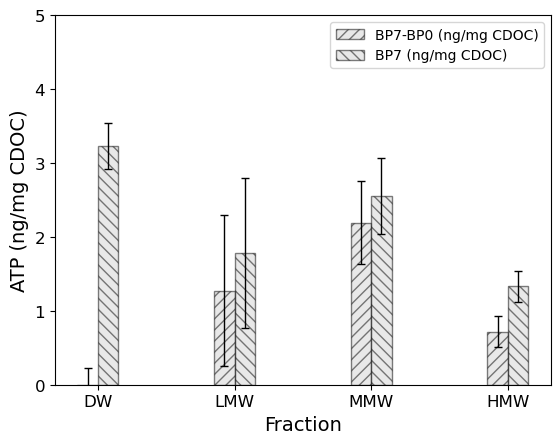

In [85]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_norm["BP7-BP0 average norm"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='///',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7_BP0_norm,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_norm["BP7 average norm"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='\\\\\\',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BP7_norm,
        error_kw = dict(lw=1, capsize=3, capthick=1))


# Setting axis labels and ticks
ax.set_ylabel('ATP (ng/mg CDOC)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,5)

# fixing the decimals of the y-axis
plt.locator_params(axis='y', nbins=5)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Adding the legend and showing the plot
plt.legend(['BP7-BP0 (ng/mg CDOC)', 'BP7 (ng/mg CDOC)'], loc='upper right')

plt.show()

# plt.savefig(fig_path + 'DW_BP7_norm.png', dpi=200, bbox_inches='tight')

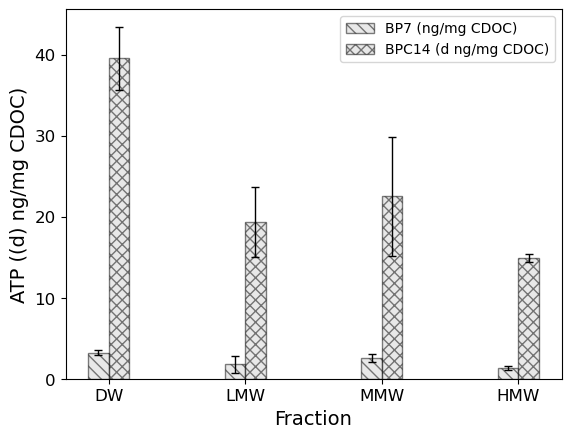

In [86]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_norm["BP7 average norm"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='\\\\\\',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7_norm,
             error_kw = dict(lw=1, capsize=3, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_norm["BPC14 average norm"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='xxx',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BPC14_norm,
        error_kw = dict(lw=1, capsize=3, capthick=1))


# Setting axis labels and ticks
ax.set_ylabel('ATP ((d) ng/mg CDOC)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim(0,5)

# fixing the decimals of the y-axis
plt.locator_params(axis='y', nbins=5)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Adding the legend and showing the plot
plt.legend(['BP7 (ng/mg CDOC)', 'BPC14 (d ng/mg CDOC)'], loc='upper right')

plt.show()

# plt.savefig(fig_path + 'DW_BPC14_norm.png', dpi=200, bbox_inches='tight')

# 4. Code dependencies

Below, all dependencies are printed to show which computational environment is being used in this script (for example which python version, which packages, which system, etc.). 



In [89]:
# first install the watermark package

! pip install watermark

Defaulting to user installation because normal site-packages is not writeable


In [97]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,re,os,pandas,numpy,matplotlib,seaborn,watermark

# date
print (" ")
%watermark -u -n -t -z 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

wget      : 3.2
re        : 2.2.1
os        : unknown
pandas    : 1.4.4
numpy     : 1.21.5
matplotlib: 3.5.2
seaborn   : 0.11.2
watermark : 2.4.3

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Sep 06 2023 11:17:07Romance Daylight Time



In [102]:
! pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac